In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Simulated customer data
data = {
    'CustomerID': range(1, 11),
    'Annual Income (k$)': [15, 16, 17, 18, 19, 70, 85, 88, 90, 95],
    'Spending Score': [39, 81, 6, 77, 40, 77, 13, 75, 60, 80]
}
df = pd.DataFrame(data)
df.set_index("CustomerID", inplace=True)
df.head()


,Annual Income (k$),Spending Score
CustomerID,,
1,15,39
2,16,81
3,17,6
4,18,77
5,19,40


In [5]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_data 

array([[-1.04217016, -0.58320453],
       [-1.01346024,  0.967086  ],
       [-0.98475032, -1.80128995],
       [-0.9560404 ,  0.81943928],
       [-0.92733047, -0.54629285],
       [ 0.53687554,  0.81943928],
       [ 0.96752436, -1.5429082 ],
       [ 1.05365413,  0.74561592],
       [ 1.11107397,  0.19194073],
       [ 1.25462358,  0.93017432]])

In [6]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)
df['Cluster']

CustomerID
1     2
2     0
3     2
4     0
5     2
6     1
7     2
8     1
9     1
10    1
Name: Cluster, dtype: int32

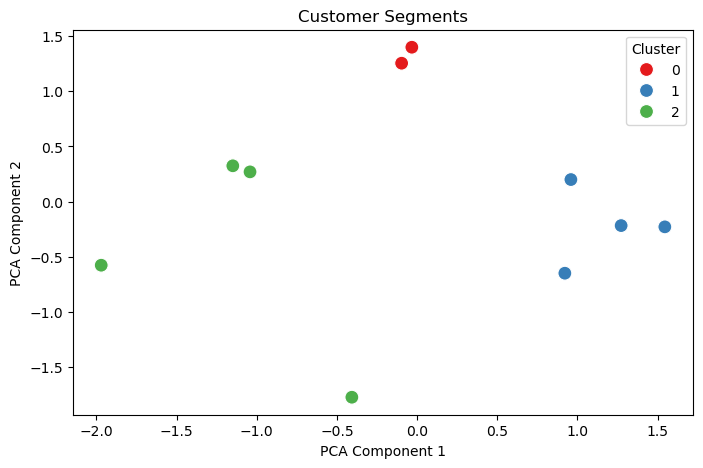

In [7]:
# Reduce dimensions for visualization
pca = PCA(n_components=2)
components = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=components[:, 0], y=components[:, 1], hue=df['Cluster'], palette='Set1', s=100)
plt.title('Customer Segments')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()
